In [0]:
from fastai.collab import *
from fastai.tabular import *

In [0]:
user,item,title = 'userId','movieId','title'

In [3]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [4]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [0]:
y_range = [0,5.5]  #rabge set o 5.5 as sigmoid func never will reach 5 if we write upper limit as exactly 5 due to its asymptotic nature

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


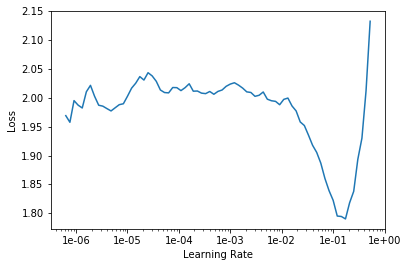

In [8]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [9]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.606308,0.923765,00:01
1,0.841620,0.675603,00:01
2,0.658180,0.665501,00:01


In [16]:
path=Config.data_path('ml-100k.zip')

TypeError: ignored

In [17]:
path

PosixPath('/root/.fastai/data/ml-100k')

In [0]:
p = Path('ml-100k')

In [21]:
!unzip ml-100k.zip

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [23]:
ratings = pd.read_csv(p/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [25]:
movies = pd.read_csv(p/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [26]:
len(ratings)

100000

In [27]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

In [29]:
data.show_batch()

userId,title,target
626,Spawn (1997),1.0
442,Strange Days (1995),3.0
341,Money Talks (1997),4.0
399,"Rock, The (1996)",2.0
601,Back to the Future (1985),2.0


In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


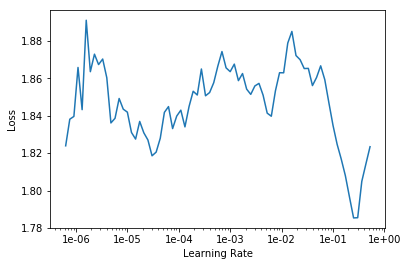

In [32]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [33]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.907035,0.943682,00:13
1,0.853638,0.886274,00:13
2,0.769769,0.834510,00:14
3,0.652947,0.812902,00:14
4,0.551413,0.811386,00:14


In [0]:
learn.save('x')

In [35]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [36]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

In [37]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [0]:
item0 = lambda o:o[0]

In [40]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3994),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3272),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2715), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2639), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2614), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2602), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2596), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2429), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2281), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2199), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2181), 'Leave It to Beaver (1997)', 1.8409090909090908),
 (tensor(-0.2161), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2112), 'Tales from the Hood (1995)', 2.037037037037037),
 (tensor(-0.2087), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(

In [43]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:55]

[(tensor(0.6298), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5642), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5481), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5466), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5397), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5332), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5234), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4888), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4873), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4786), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4783), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4779), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4635), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4630), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4543), 'To Kill a Mockingbird (1962)', 4.292237442922374),
 (tensor(0.4529), "One Flew Over

In [44]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [45]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [50]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2526), 'Home Alone 3 (1997)'),
 (tensor(1.2476), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.2441), "McHale's Navy (1997)"),
 (tensor(1.2171), 'Jungle2Jungle (1997)'),
 (tensor(1.1689), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.1446), 'Bio-Dome (1996)'),
 (tensor(1.0952), 'Leave It to Beaver (1997)'),
 (tensor(1.0676), 'Batman & Robin (1997)'),
 (tensor(1.0565), 'Free Willy 3: The Rescue (1997)'),
 (tensor(1.0520), 'Richie Rich (1994)')]

In [51]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1142), 'Close Shave, A (1995)'),
 (tensor(-1.0809), 'Casablanca (1942)'),
 (tensor(-1.0755), 'Chinatown (1974)'),
 (tensor(-1.0610), 'Wrong Trousers, The (1993)'),
 (tensor(-0.9980), '12 Angry Men (1957)'),
 (tensor(-0.9941), 'Secrets & Lies (1996)'),
 (tensor(-0.9636), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(-0.9574), 'Third Man, The (1949)'),
 (tensor(-0.9560),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(-0.9495), 'Lawrence of Arabia (1962)')]

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [53]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.8664), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.8065), 'Trainspotting (1996)'),
 (tensor(0.7731), 'Sweet Hereafter, The (1997)'),
 (tensor(0.7566), 'Beavis and Butt-head Do America (1996)'),
 (tensor(0.7506), 'Serial Mom (1994)'),
 (tensor(0.7465), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.7339), 'Stupids, The (1996)'),
 (tensor(0.7227), 'Cable Guy, The (1996)'),
 (tensor(0.7216), 'Spice World (1997)'),
 (tensor(0.7158), 'Dead Man (1995)')]

In [54]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1277), 'Braveheart (1995)'),
 (tensor(-1.0783), 'Titanic (1997)'),
 (tensor(-1.0353), 'Raiders of the Lost Ark (1981)'),
 (tensor(-0.9064), "It's a Wonderful Life (1946)"),
 (tensor(-0.9003), 'American President, The (1995)'),
 (tensor(-0.8747), 'Pretty Woman (1990)'),
 (tensor(-0.8692), 'Sleepless in Seattle (1993)'),
 (tensor(-0.8686), 'Forrest Gump (1994)'),
 (tensor(-0.8545), 'Fugitive, The (1993)'),
 (tensor(-0.8424), 'Independence Day (ID4) (1996)')]

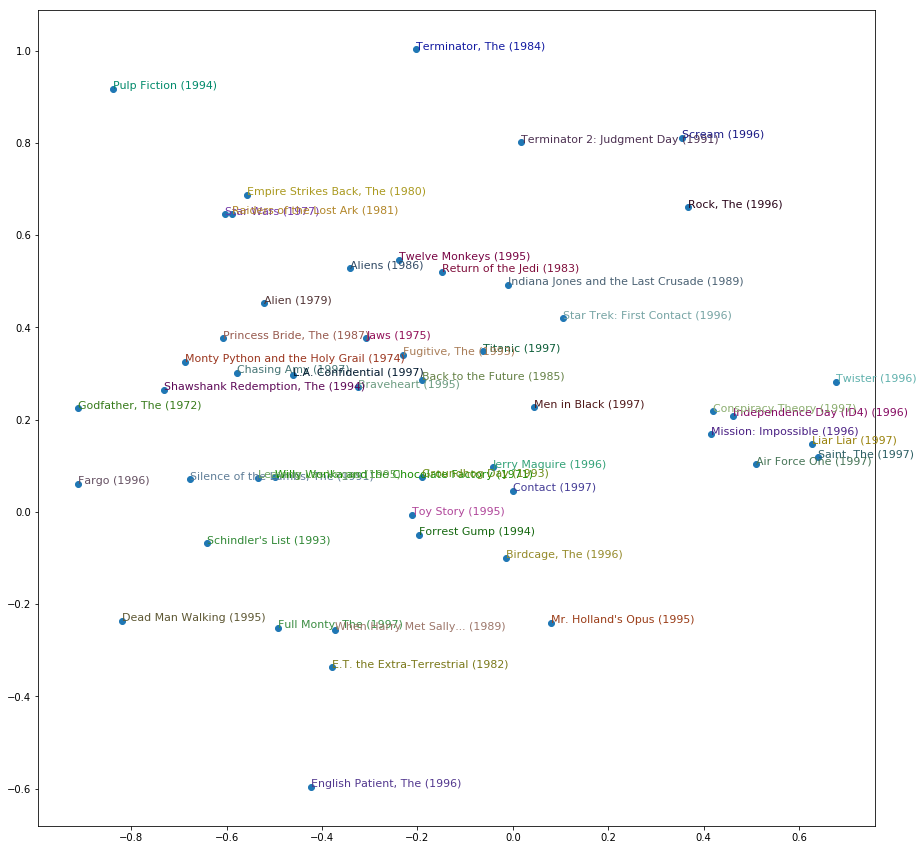

In [55]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()